In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

In [3]:
co = pd.read_csv("./CO2_Emissions_Canada.csv")

In [4]:
co.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
co.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [6]:
co.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [7]:
co.count()

Make                                7385
Model                               7385
Vehicle Class                       7385
Engine Size(L)                      7385
Cylinders                           7385
Transmission                        7385
Fuel Type                           7385
Fuel Consumption City (L/100 km)    7385
Fuel Consumption Hwy (L/100 km)     7385
Fuel Consumption Comb (L/100 km)    7385
Fuel Consumption Comb (mpg)         7385
CO2 Emissions(g/km)                 7385
dtype: int64

Performing one hot encoding and removing some columns for linear regression

In [8]:
co["Make"].unique().size


42

In [9]:
column_names_to_one_hot = ["Make","Vehicle Class","Transmission", "Fuel Type","Model"]

In [10]:
co = pd.get_dummies(co, columns = column_names_to_one_hot)

In [11]:
co.loc[:20,:]

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,...,Model_Z4 M40i,Model_Z4 sDRIVE28i,Model_Z4 sDRIVE35i,Model_Z4 sDRIVE35is,Model_Z4 sDrive30i,Model_iM,Model_iQ,Model_tC,Model_xB,Model_xD
0,2.0,4,9.9,6.7,8.5,33,196,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,11.2,7.7,9.6,29,221,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.5,4,6.0,5.8,5.9,48,136,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,12.7,9.1,11.1,25,255,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.5,6,12.1,8.7,10.6,27,244,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3.5,6,11.9,7.7,10.0,28,230,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3.5,6,11.8,8.1,10.1,28,232,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3.7,6,12.8,9.0,11.1,25,255,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3.7,6,13.4,9.5,11.6,24,267,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2.4,4,10.6,7.5,9.2,31,212,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Removing duplicates

In [12]:
co.index[co.duplicated()]

Int64Index([1075, 1076, 1081, 1082, 1084, 1086, 1104, 1105, 1107, 1110,
            ...
            7350, 7351, 7352, 7353, 7354, 7356, 7365, 7366, 7367, 7368],
           dtype='int64', length=1103)

In [13]:
co.duplicated().sum()

1103

In [14]:
co.drop(axis="rows", labels=co.index[co.duplicated()], inplace=True)

In [15]:
co.duplicated().sum()
co.count()

Engine Size(L)                      6282
Cylinders                           6282
Fuel Consumption City (L/100 km)    6282
Fuel Consumption Hwy (L/100 km)     6282
Fuel Consumption Comb (L/100 km)    6282
                                    ... 
Model_iM                            6282
Model_iQ                            6282
Model_tC                            6282
Model_xB                            6282
Model_xD                            6282
Length: 2150, dtype: int64

In [16]:
y = co["CO2 Emissions(g/km)"]
co = co.drop(columns=["CO2 Emissions(g/km)"])

removing Skew

In [17]:
co

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Model_Z4 M40i,Model_Z4 sDRIVE28i,Model_Z4 sDRIVE35i,Model_Z4 sDRIVE35is,Model_Z4 sDrive30i,Model_iM,Model_iQ,Model_tC,Model_xB,Model_xD
0,2.0,4,9.9,6.7,8.5,33,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,11.2,7.7,9.6,29,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.5,4,6.0,5.8,5.9,48,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,12.7,9.1,11.1,25,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.5,6,12.1,8.7,10.6,27,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7381,2.0,4,11.2,8.3,9.9,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7382,2.0,4,11.7,8.6,10.3,27,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7383,2.0,4,11.2,8.3,9.9,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
co["Engine Size(L)"].describe()

count    6282.000000
mean        3.161812
std         1.365201
min         0.900000
25%         2.000000
50%         3.000000
75%         3.700000
max         8.400000
Name: Engine Size(L), dtype: float64

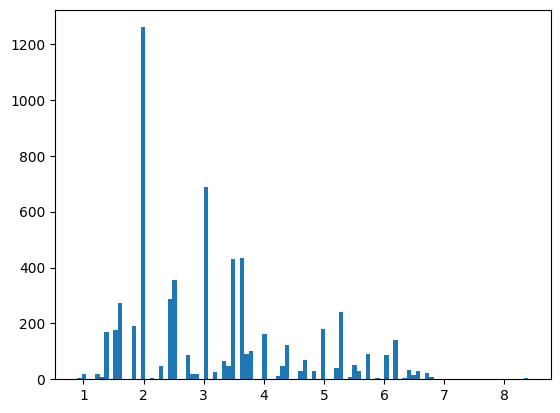

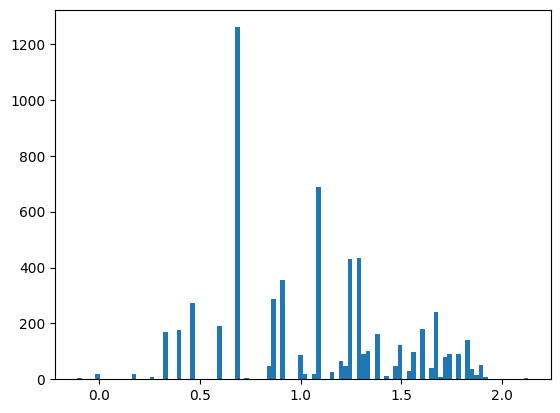

In [19]:
plt.hist(co["Engine Size(L)"], bins=100)
plt.show()
co["Engine Size(L)"] = np.log(co["Engine Size(L)"])
plt.hist(co["Engine Size(L)"], bins=100)
plt.show()

In [20]:
co["Cylinders"].describe()

count    6282.000000
mean        5.618911
std         1.846250
min         3.000000
25%         4.000000
50%         6.000000
75%         6.000000
max        16.000000
Name: Cylinders, dtype: float64

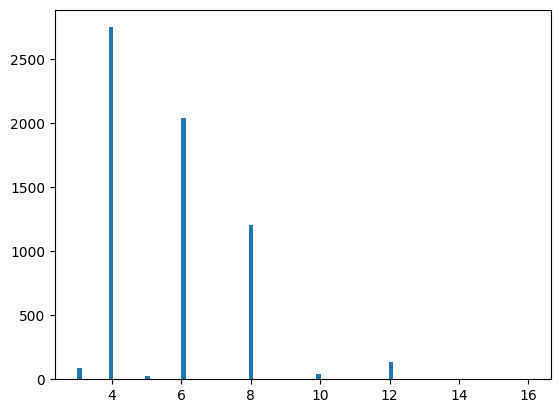

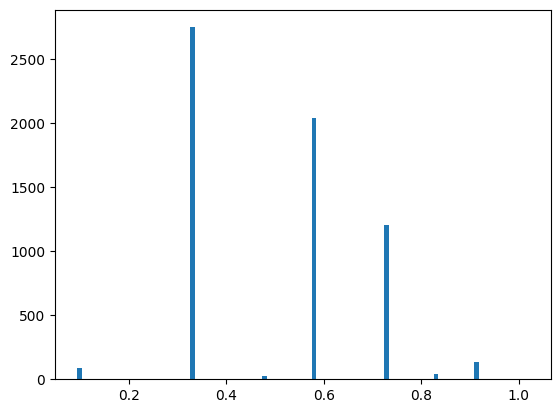

In [21]:
plt.hist(co["Cylinders"], bins=100)
plt.show()
co["Cylinders"] = np.log(np.log(co["Cylinders"]))
plt.hist(co["Cylinders"], bins=100)
plt.show()

In [22]:
co["Fuel Consumption City (L/100 km)"].describe()

count    6282.000000
mean       12.610220
std         3.553066
min         4.200000
25%        10.100000
50%        12.100000
75%        14.700000
max        30.600000
Name: Fuel Consumption City (L/100 km), dtype: float64

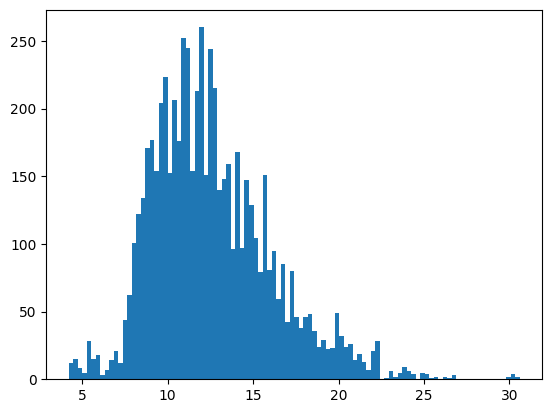

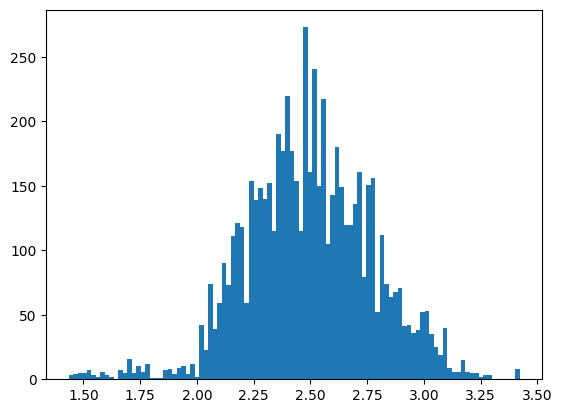

In [23]:
plt.hist(co["Fuel Consumption City (L/100 km)"], bins=100)
plt.show()
co["Fuel Consumption City (L/100 km)"] = np.log(co["Fuel Consumption City (L/100 km)"])
plt.hist(co["Fuel Consumption City (L/100 km)"], bins=100)
plt.show()

In [24]:
co["Fuel Consumption Hwy (L/100 km)"].describe()

count    6282.000000
mean        9.070583
std         2.278884
min         4.000000
25%         7.500000
50%         8.700000
75%        10.300000
max        20.600000
Name: Fuel Consumption Hwy (L/100 km), dtype: float64

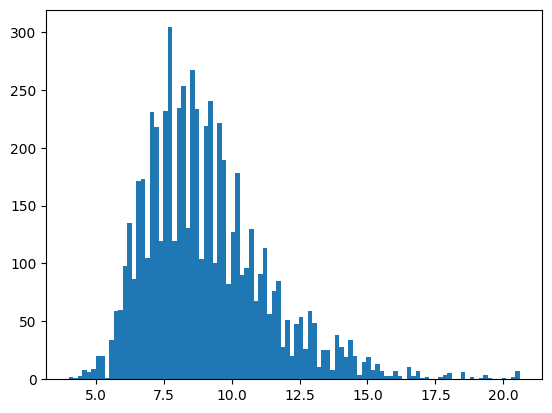

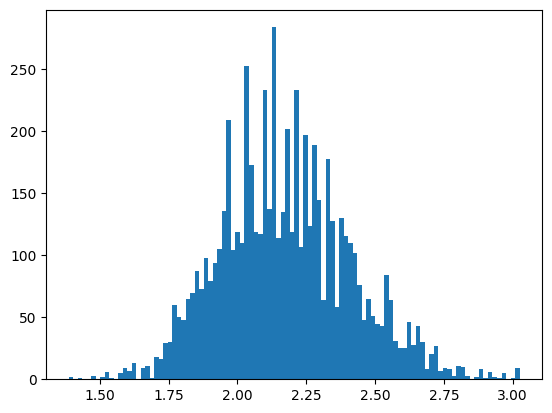

In [25]:
plt.hist(co["Fuel Consumption Hwy (L/100 km)"], bins=100)
plt.show()
co["Fuel Consumption Hwy (L/100 km)"] = np.log(co["Fuel Consumption Hwy (L/100 km)"])
plt.hist(co["Fuel Consumption Hwy (L/100 km)"], bins=100)
plt.show()

In [26]:
co["Fuel Consumption Comb (L/100 km)"].describe()

count    6282.000000
mean       11.017876
std         2.946876
min         4.100000
25%         8.900000
50%        10.600000
75%        12.700000
max        26.100000
Name: Fuel Consumption Comb (L/100 km), dtype: float64

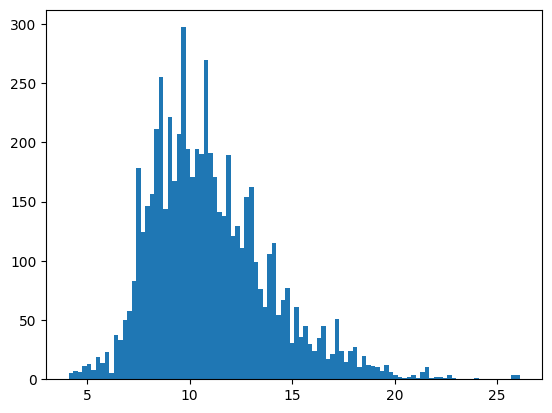

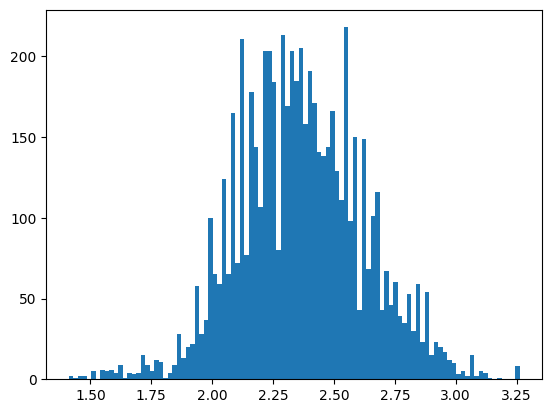

In [27]:
plt.hist(co["Fuel Consumption Comb (L/100 km)"], bins=100)
plt.show()
co["Fuel Consumption Comb (L/100 km)"] = np.log(co["Fuel Consumption Comb (L/100 km)"])
plt.hist(co["Fuel Consumption Comb (L/100 km)"], bins=100)
plt.show()

In [28]:
co["Fuel Consumption Comb (mpg)"].describe()

count    6282.000000
mean       27.411016
std         7.245318
min        11.000000
25%        22.000000
50%        27.000000
75%        32.000000
max        69.000000
Name: Fuel Consumption Comb (mpg), dtype: float64

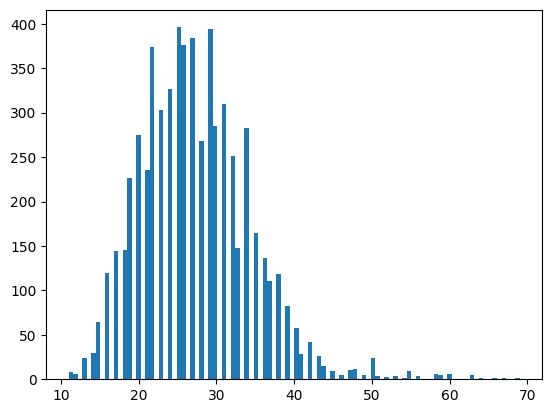

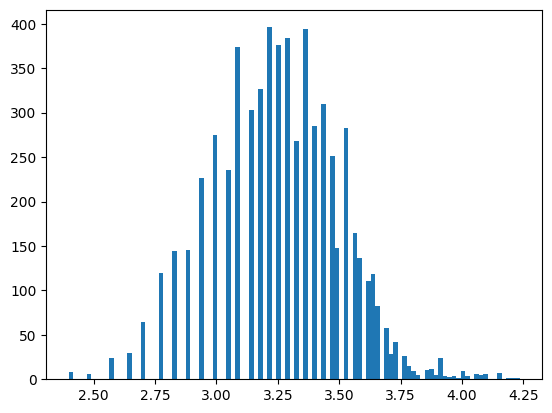

In [29]:
plt.hist(co["Fuel Consumption Comb (mpg)"], bins=100)
plt.show()
co["Fuel Consumption Comb (mpg)"] = np.log(co["Fuel Consumption Comb (mpg)"])
plt.hist(co["Fuel Consumption Comb (mpg)"], bins=100)
plt.show()

In [30]:
y.describe()

count    6282.000000
mean      251.157752
std        59.290426
min        96.000000
25%       208.000000
50%       246.000000
75%       289.000000
max       522.000000
Name: CO2 Emissions(g/km), dtype: float64

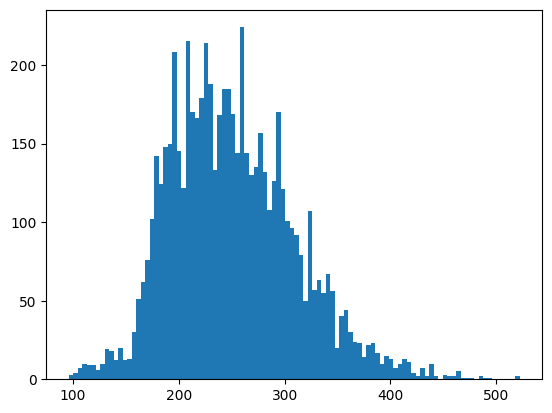

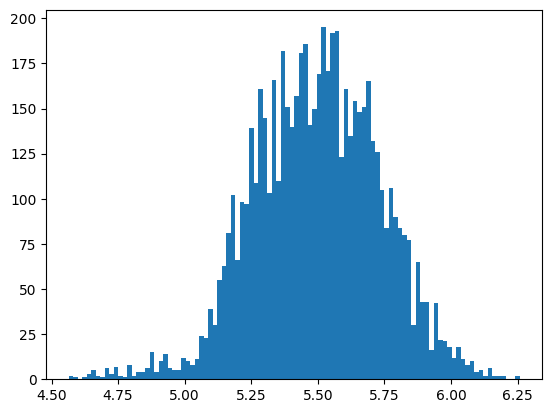

In [31]:
plt.hist(y, bins=100)
plt.show()
y = np.log(y)
plt.hist(y, bins=100)
plt.show()

normalization for the data

In [32]:
co = (co - co.min())/(co.max()-co.min())
co.insert(len(co.columns),"CO2 Emissions(g/km)",y )

In [33]:
co

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Model_Z4 sDRIVE28i,Model_Z4 sDRIVE35i,Model_Z4 sDRIVE35is,Model_Z4 sDrive30i,Model_iM,Model_iQ,Model_tC,Model_xB,Model_xD,CO2 Emissions(g/km)
0,0.357499,0.251246,0.431766,0.314713,0.393895,0.598304,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.278115
1,0.439126,0.251246,0.493893,0.399590,0.459643,0.527935,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.398163
2,0.228701,0.251246,0.179602,0.226702,0.196637,0.802362,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.912655
3,0.608045,0.528392,0.557183,0.501514,0.538080,0.447106,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.541264
4,0.608045,0.528392,0.532813,0.474088,0.513179,0.489019,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.497168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,0.357499,0.251246,0.470896,0.399590,0.448269,0.546398,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.389072
7381,0.357499,0.251246,0.493893,0.445371,0.476268,0.527935,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.446737
7382,0.357499,0.251246,0.515885,0.467034,0.497668,0.489019,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.480639
7383,0.357499,0.251246,0.493893,0.445371,0.476268,0.527935,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.446737


Outliers removal

In [34]:
co

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Model_Z4 sDRIVE28i,Model_Z4 sDRIVE35i,Model_Z4 sDRIVE35is,Model_Z4 sDrive30i,Model_iM,Model_iQ,Model_tC,Model_xB,Model_xD,CO2 Emissions(g/km)
0,0.357499,0.251246,0.431766,0.314713,0.393895,0.598304,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.278115
1,0.439126,0.251246,0.493893,0.399590,0.459643,0.527935,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.398163
2,0.228701,0.251246,0.179602,0.226702,0.196637,0.802362,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.912655
3,0.608045,0.528392,0.557183,0.501514,0.538080,0.447106,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.541264
4,0.608045,0.528392,0.532813,0.474088,0.513179,0.489019,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.497168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,0.357499,0.251246,0.470896,0.399590,0.448269,0.546398,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.389072
7381,0.357499,0.251246,0.493893,0.445371,0.476268,0.527935,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.446737
7382,0.357499,0.251246,0.515885,0.467034,0.497668,0.489019,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.480639
7383,0.357499,0.251246,0.493893,0.445371,0.476268,0.527935,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.446737


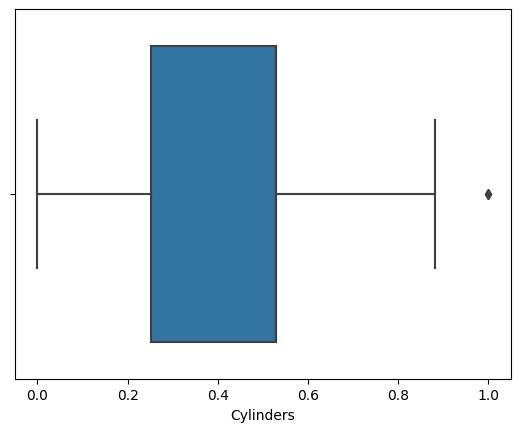

In [35]:
sns.boxplot(x=co["Cylinders"])
plt.show()

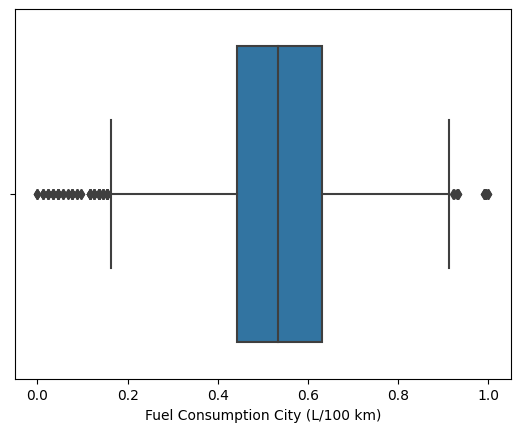

In [36]:
sns.boxplot(x=co["Fuel Consumption City (L/100 km)"])
plt.show()

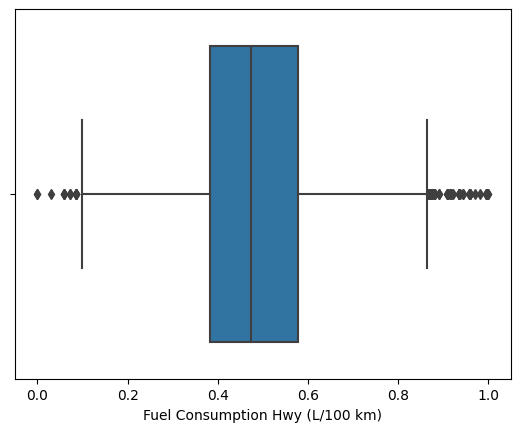

In [37]:
sns.boxplot(x=co["Fuel Consumption Hwy (L/100 km)"])
plt.show()

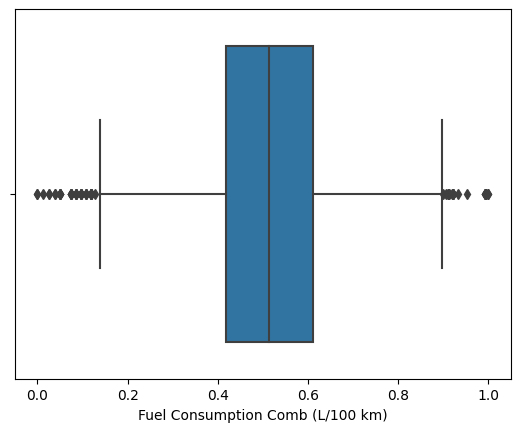

In [38]:
sns.boxplot(x=co["Fuel Consumption Comb (L/100 km)"])
plt.show()

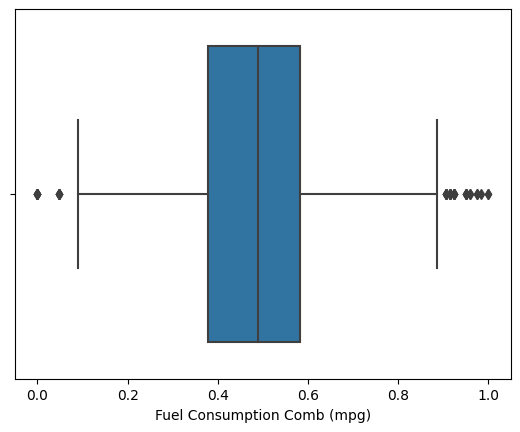

In [39]:
sns.boxplot(x=co["Fuel Consumption Comb (mpg)"])
plt.show()

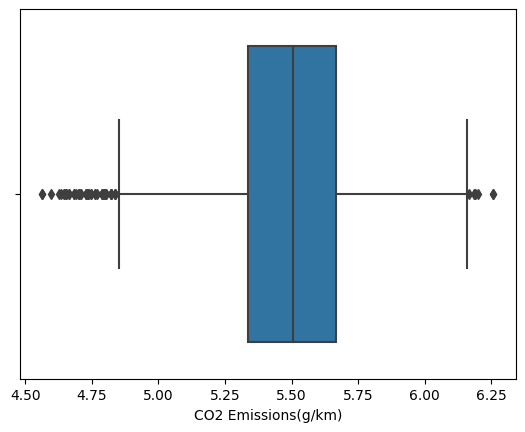

In [40]:
sns.boxplot(x=co["CO2 Emissions(g/km)"])
plt.show()

In [41]:
class OutlierRemoval: 
    def __init__(self, lower_quartile, upper_quartile):
        self.lower_whisker = lower_quartile - 1.5*(upper_quartile - lower_quartile)
        self.upper_whisker = upper_quartile + 1.5*(upper_quartile - lower_quartile)
    def removeOutlier(self, x):
        return (x if x <= self.upper_whisker and x >= self.lower_whisker else (self.lower_whisker if x < self.lower_whisker else (self.upper_whisker)))

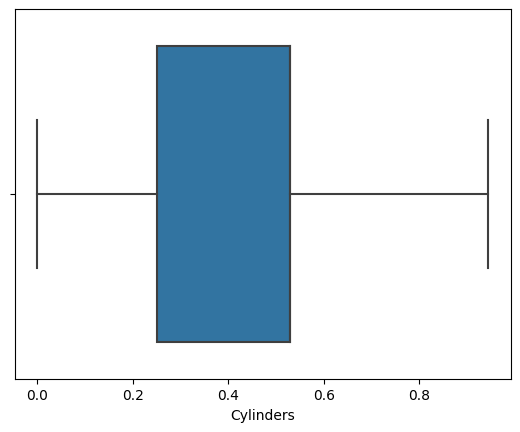

In [42]:
outlier1 = OutlierRemoval(co["Cylinders"].quantile(0.25), co["Cylinders"].quantile(0.75))
t1 = co["Cylinders"].apply(outlier1.removeOutlier)
co["Cylinders"] = t1
sns.boxplot(x=co["Cylinders"])
plt.show()

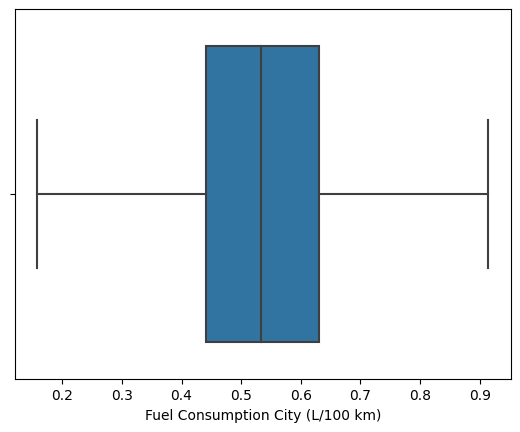

In [43]:
outlier2 = OutlierRemoval(co["Fuel Consumption City (L/100 km)"].quantile(0.25), co["Fuel Consumption City (L/100 km)"].quantile(0.75))
t2 = co["Fuel Consumption City (L/100 km)"].apply(outlier2.removeOutlier)
co["Fuel Consumption City (L/100 km)"] = t2
sns.boxplot(x=co["Fuel Consumption City (L/100 km)"])
plt.show()

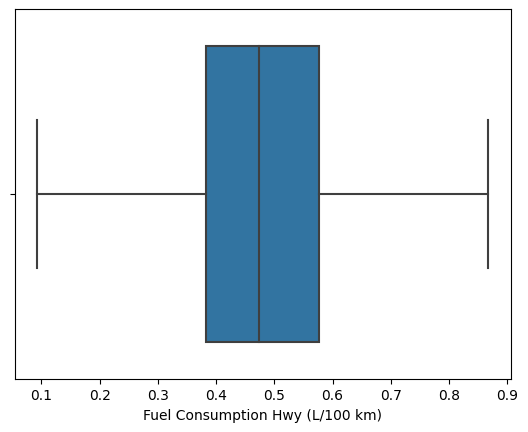

In [44]:
outlier3 = OutlierRemoval(co["Fuel Consumption Hwy (L/100 km)"].quantile(0.25), co["Fuel Consumption Hwy (L/100 km)"].quantile(0.75))
t3 = co["Fuel Consumption Hwy (L/100 km)"].apply(outlier3.removeOutlier)
co["Fuel Consumption Hwy (L/100 km)"] = t3
sns.boxplot(x=co["Fuel Consumption Hwy (L/100 km)"])
plt.show()

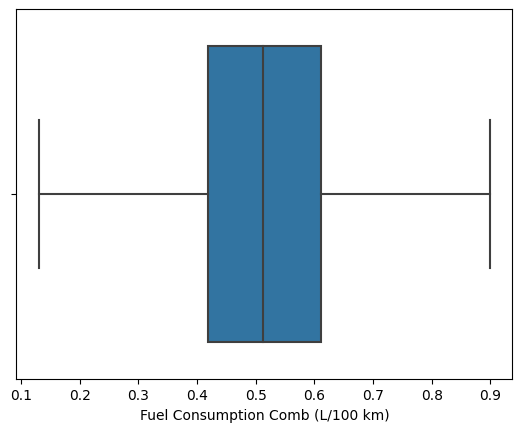

In [45]:
outlier4 = OutlierRemoval(co["Fuel Consumption Comb (L/100 km)"].quantile(0.25), co["Fuel Consumption Comb (L/100 km)"].quantile(0.75))
t4 = co["Fuel Consumption Comb (L/100 km)"].apply(outlier4.removeOutlier)
co["Fuel Consumption Comb (L/100 km)"] = t4
sns.boxplot(x=co["Fuel Consumption Comb (L/100 km)"])
plt.show()

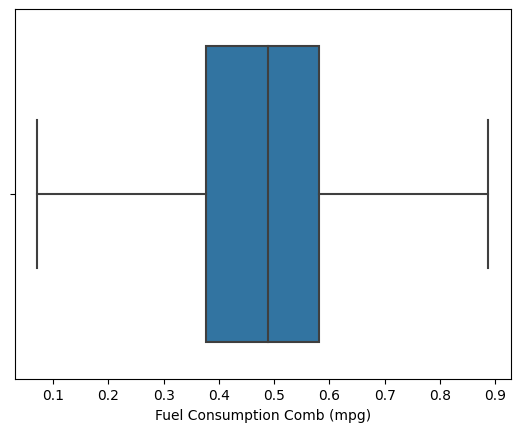

In [46]:
outlier5 = OutlierRemoval(co["Fuel Consumption Comb (mpg)"].quantile(0.25), co["Fuel Consumption Comb (mpg)"].quantile(0.75))
t5 = co["Fuel Consumption Comb (mpg)"].apply(outlier5.removeOutlier)
co["Fuel Consumption Comb (mpg)"] = t5
sns.boxplot(x=co["Fuel Consumption Comb (mpg)"])
plt.show()

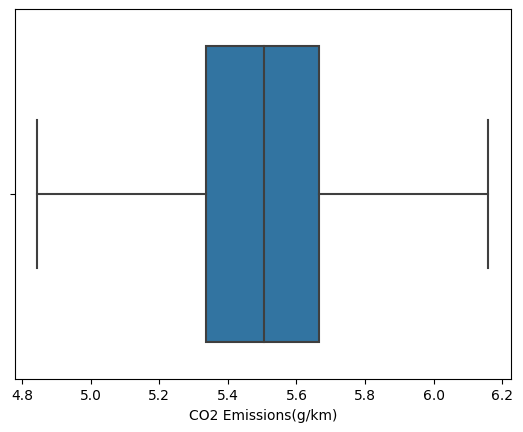

In [47]:
outlier5 = OutlierRemoval(co["CO2 Emissions(g/km)"].quantile(0.25), co["CO2 Emissions(g/km)"].quantile(0.75))
t5 = co["CO2 Emissions(g/km)"].apply(outlier5.removeOutlier)
co["CO2 Emissions(g/km)"] = t5
sns.boxplot(x=co["CO2 Emissions(g/km)"])
plt.show()

correlation

In [48]:
co

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Model_Z4 sDRIVE28i,Model_Z4 sDRIVE35i,Model_Z4 sDRIVE35is,Model_Z4 sDrive30i,Model_iM,Model_iQ,Model_tC,Model_xB,Model_xD,CO2 Emissions(g/km)
0,0.357499,0.251246,0.431766,0.314713,0.393895,0.598304,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.278115
1,0.439126,0.251246,0.493893,0.399590,0.459643,0.527935,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.398163
2,0.228701,0.251246,0.179602,0.226702,0.196637,0.802362,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.912655
3,0.608045,0.528392,0.557183,0.501514,0.538080,0.447106,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.541264
4,0.608045,0.528392,0.532813,0.474088,0.513179,0.489019,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.497168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,0.357499,0.251246,0.470896,0.399590,0.448269,0.546398,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.389072
7381,0.357499,0.251246,0.493893,0.445371,0.476268,0.527935,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.446737
7382,0.357499,0.251246,0.515885,0.467034,0.497668,0.489019,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.480639
7383,0.357499,0.251246,0.493893,0.445371,0.476268,0.527935,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.446737


In [49]:
c=co.corr()
ct = abs(c["CO2 Emissions(g/km)"])
rf = ct[ct>0.15]
rf

Engine Size(L)                           0.848637
Cylinders                                0.823469
Fuel Consumption City (L/100 km)         0.944993
Fuel Consumption Hwy (L/100 km)          0.917499
Fuel Consumption Comb (L/100 km)         0.946614
Fuel Consumption Comb (mpg)              0.946031
Make_GMC                                 0.181000
Make_HONDA                               0.183049
Make_LAMBORGHINI                         0.160338
Make_MAZDA                               0.150304
Make_MINI                                0.171338
Make_ROLLS-ROYCE                         0.173562
Vehicle Class_COMPACT                    0.244838
Vehicle Class_MID-SIZE                   0.225906
Vehicle Class_PICKUP TRUCK - STANDARD    0.250090
Vehicle Class_STATION WAGON - SMALL      0.158419
Vehicle Class_SUV - STANDARD             0.303154
Vehicle Class_VAN - PASSENGER            0.210784
Transmission_A6                          0.163857
Transmission_A8                          0.154587


functions

In [50]:
def mean_square_error_calculated(y_true, y_pred):
    return np.square(np.subtract(y_true,y_pred)).mean()

In [51]:
def mean_absolute_error_calculated(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


Done with the preprocessing, can proceed with the regression.

In [52]:
def train_test_data(hd):

    shuffle_df = hd.sample(frac=1)
    train_set = shuffle_df[:int(0.9 * len(hd))]
    X_train = train_set.drop(columns=["CO2 Emissions(g/km)"])
    Y_train = train_set["CO2 Emissions(g/km)"]
    
    shuffle_df = hd.sample(frac=1)
    test_set = shuffle_df[int(0.1*len(hd)):]
    X_test = test_set.drop(columns=["CO2 Emissions(g/km)"])
    Y_test = test_set["CO2 Emissions(g/km)"]


    return X_train, Y_train, X_test, Y_test

In [53]:
X_train, Y_train, X_test, Y_test = train_test_data(co)

In [54]:
ones = np.ones([X_train.shape[0],1])
X_train.insert(0,'ones', ones )
ones = np.ones([X_test.shape[0],1])
X_test.insert(0,'ones', ones )

X_train

,ones,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,...,Model_Z4 M40i,Model_Z4 sDRIVE28i,Model_Z4 sDRIVE35i,Model_Z4 sDRIVE35is,Model_Z4 sDrive30i,Model_iM,Model_iQ,Model_tC,Model_xB,Model_xD
3318,1.0,0.608045,0.528392,0.545145,0.474088,0.518252,0.468465,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2550,1.0,0.197813,0.251246,0.354991,0.332659,0.347463,0.645690,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,1.0,0.197813,0.251246,0.349032,0.205292,0.296663,0.703070,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4098,1.0,0.539030,0.528392,0.507203,0.452678,0.487074,0.508824,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
615,1.0,0.357499,0.251246,0.515885,0.391614,0.476268,0.527935,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1.0,0.849358,0.881665,0.785858,0.680381,0.752249,0.237074,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6029,1.0,0.439126,0.251246,0.410998,0.350092,0.387501,0.614562,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5499,1.0,0.523852,0.528392,0.587943,0.494772,0.557206,0.447106,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1668,1.0,0.439126,0.251246,0.498369,0.445371,0.481698,0.508824,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
Y_train

3318    5.521461
2550    5.209486
203     5.093750
4098    5.468060
615     5.429346
          ...   
72      5.940171
6029    5.293305
5499    5.590987
1668    5.438079
5931    4.844205
Name: CO2 Emissions(g/km), Length: 5653, dtype: float64

In [56]:

W = np.linalg.pinv(X_train.T@X_train)@(X_train.T@Y_train) 
Y_pred = X_train @ W


In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
MSE1 = mean_squared_error(Y_train, Y_pred)
MAE1 = mean_absolute_error(Y_train, Y_pred)
MSE = mean_square_error_calculated(Y_train, Y_pred)
MAE = mean_absolute_error_calculated(Y_train, Y_pred)
Y_p = X_test @ W
mse1 = mean_squared_error(Y_test,Y_p)
mae1 = mean_absolute_error(Y_test,Y_p)
mse = mean_square_error_calculated(Y_test,Y_p)
mae = mean_absolute_error_calculated(Y_test,Y_p)

In [58]:
mse1

0.0001179154551614152

In [59]:
mae1

0.00639095662554889

In [60]:
W.max()


3.4626309101637505

Gradient descent

In [61]:
Y_test.shape

(5654,)

In [62]:
X_train.shape

(5653, 2150)

In [63]:



learning_rate = 0.5 #0.9
n = 1000

parameters = W[:]+0.1
nodp = co["CO2 Emissions(g/km)"].count()

costs = []
print(W)

for _ in range(n):
    y = X_train@parameters
    cost = np.mean((Y_train - y)**2)
    costs.append(cost)
    gradient_matrix = (X_train.T)@(y - Y_train)/nodp
    parameters = parameters - (learning_rate * gradient_matrix)/nodp
print(parameters)




[3.46263091e+00 1.73575421e-02 7.16363256e-04 ... 1.57985731e-02
 5.92528363e-03 1.61833453e-02]
ones                                3.505144
Engine Size(L)                      0.086561
Cylinders                           0.074701
Fuel Consumption City (L/100 km)    0.466527
Fuel Consumption Hwy (L/100 km)     0.270831
                                      ...   
Model_iM                            0.100000
Model_iQ                            0.114092
Model_tC                            0.115750
Model_xB                            0.105886
Model_xD                            0.116164
Length: 2150, dtype: float64


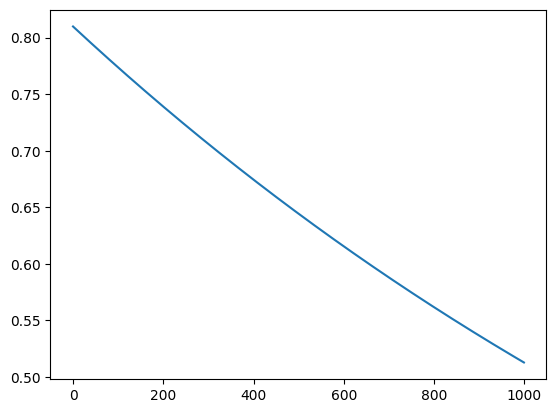

In [64]:
plt.plot(costs)

In [65]:
Y_pred1 = X_train@parameters
from sklearn.metrics import mean_squared_error


In [66]:
MSE = mean_square_error_calculated(Y_train, Y_pred1)
MAE = mean_absolute_error_calculated(Y_train, Y_pred1)
Y_p = X_test @ parameters
mse = mean_square_error_calculated(Y_test,Y_p)
mae = mean_absolute_error_calculated(Y_test,Y_p)

In [67]:
mse

0.512064782026593

In [68]:
mae

0.7140064085816112

Univariate linear regression

Closed form

In [69]:
train_X = X_train.iloc[:,:4]
train_X = train_X.drop(columns=["Engine Size(L)","Cylinders"])
test_X = X_test.iloc[:,:4]
test_X = test_X.drop(columns=["Engine Size(L)","Cylinders"])


In [70]:
train_X.iloc[:,:]

,ones,Fuel Consumption City (L/100 km)
3318,1.0,0.545145
2550,1.0,0.354991
203,1.0,0.349032
4098,1.0,0.507203
615,1.0,0.515885
...,...,...
72,1.0,0.785858
6029,1.0,0.410998
5499,1.0,0.587943
1668,1.0,0.498369


In [71]:

w0, w1 = np.linalg.pinv(train_X.T@train_X)@(train_X.T@Y_train)
Yp_train = np.array(train_X.iloc[:,:1]*w0) + np.array(train_X.iloc[:,1:]*w1)


In [72]:
Y_train

3318    5.521461
2550    5.209486
203     5.093750
4098    5.468060
615     5.429346
          ...   
72      5.940171
6029    5.293305
5499    5.590987
1668    5.438079
5931    4.844205
Name: CO2 Emissions(g/km), Length: 5653, dtype: float64

In [73]:
MSE = mean_square_error_calculated(Yp_train, np.array(Y_train))
MAE = mean_absolute_error_calculated(Yp_train, np.array(Y_train))
Yp_test = np.array(test_X.iloc[:,:1]*w0) + np.array(test_X.iloc[:,1:]*w1)
mse = mean_square_error_calculated(Yp_test, np.array(Y_test))
mae = mean_absolute_error_calculated(Yp_test, np.array(Y_test))

In [74]:
mse

0.10348792164677163

In [75]:
mae

0.2569783631970412

gradient descent

In [76]:
parameters = [w0-0.1, w1-0.1]

costs = []

for _ in range(n):
    y = train_X@parameters
    cost = np.mean((Y_train - y)**2)
    costs.append(cost)
    gradient_matrix = (train_X.T)@(y - Y_train)/nodp
    parameters = parameters - (learning_rate * gradient_matrix)/nodp
print(parameters)

ones                                4.548562
Fuel Consumption City (L/100 km)    1.515218
dtype: float64


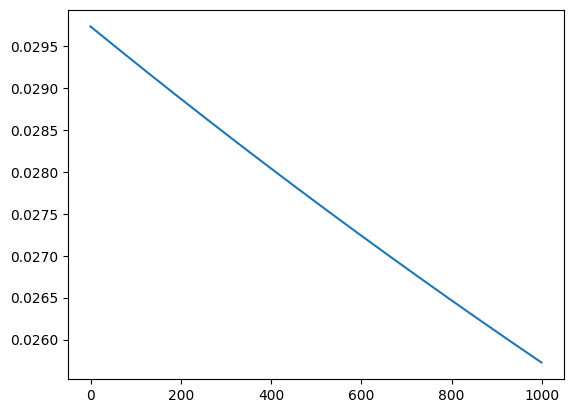

In [77]:
plt.plot(costs)

In [78]:
Y_pred1 = train_X@parameters
from sklearn.metrics import mean_squared_error


In [79]:
MSE = mean_square_error_calculated(Y_train, Y_pred1)
MAE = mean_absolute_error_calculated(Y_train, Y_pred1)
Y_p = test_X @ parameters
mse = mean_square_error_calculated(Y_test,Y_p)
mae = mean_absolute_error_calculated(Y_test,Y_p)

In [80]:
mse

0.025709885185501772

In [81]:
mae

0.1511024795587764